# Cyber Attack Detection in IoT Systems

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset Collection

In [ ]:
#Importing datasets from google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Network_Traces=pd.read_csv("gdrive/My Drive/Colab Notebooks/iot/mainSimulationAccessTraces.csv")

In [ ]:
Network_Traces

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [ ]:
Network_Traces['normality'].unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

## Features and Labels Description

In [ ]:
Features=Network_Traces.iloc[:,:-1]

In [ ]:
Labels=Network_Traces.iloc[:,-1]

In [ ]:
Labels.describe()

count     357952
unique         8
top       normal
freq      347935
Name: normality, dtype: object

In [ ]:
Features.columns

Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp'],
      dtype='object')

In [ ]:
Features['sourceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [ ]:
Features['sourceLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [ ]:
Features['destinationServiceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [ ]:
Features['destinationLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [ ]:
Features['accessedNodeType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/derived/boolean', '/basic/number', '/batteryService',
       '/doorLockService', '/thermostat', '/washingService',
       '/basic/text', '/smartPhone', nan, '/basic/composed'], dtype=object)

In [ ]:
Features['operation'].unique()

array(['registerService', 'write', 'read', 'subscribe', 'lockSubtree'],
      dtype=object)

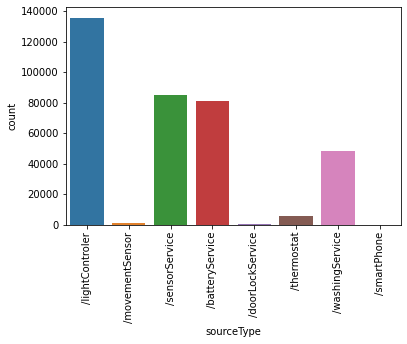

In [ ]:
sns.countplot(Features.sourceType)
plt.xticks(rotation=90)
plt.show()

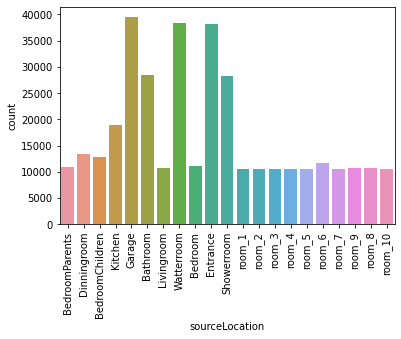

In [ ]:
sns.countplot(Features.sourceLocation)
plt.xticks(rotation=90)
plt.show()

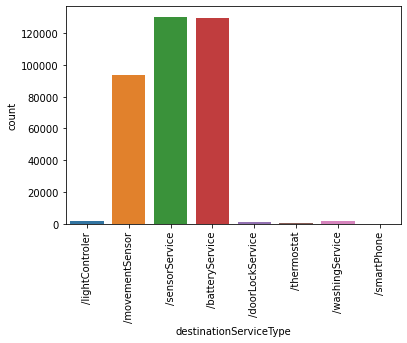

In [ ]:
sns.countplot(Features.destinationServiceType)
plt.xticks(rotation=90)
plt.show()

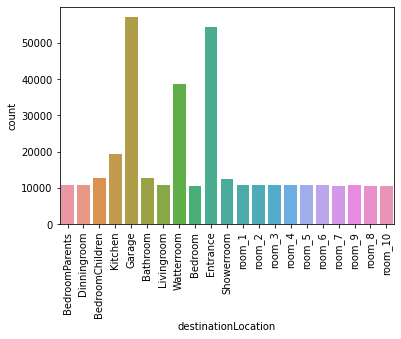

In [ ]:
sns.countplot(Features.destinationLocation)
plt.xticks(rotation=90)
plt.show()

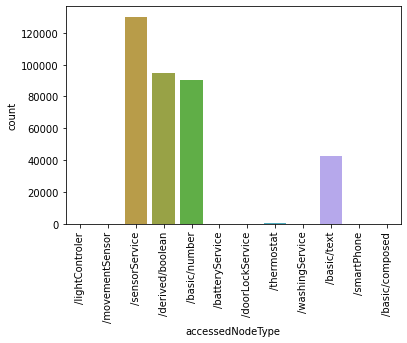

In [ ]:
sns.countplot(Features.accessedNodeType)
plt.xticks(rotation=90)
plt.show()

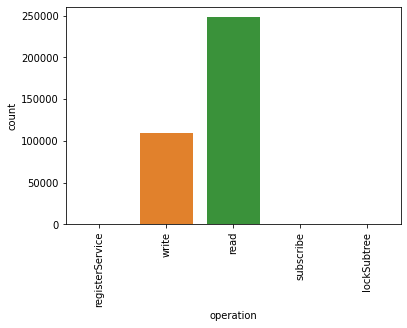

In [ ]:
sns.countplot(Features['operation'])
plt.xticks(rotation=90)
plt.show()

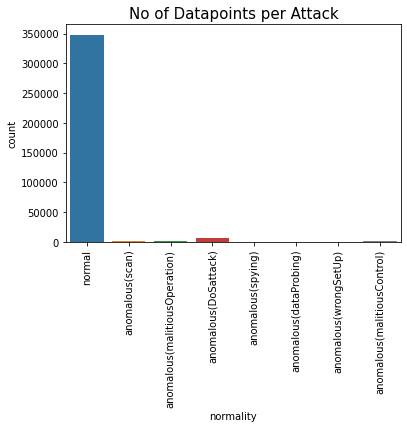

In [ ]:
plt.title('No of Datapoints per Attack', fontsize=15)
sns.countplot(Network_Traces.normality)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Network_Traces['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

# Data Preprocessing

In [ ]:
Features.value[Features.value=='true']=np.nan
Features.value[Features.value=='none']=np.nan
Features.value[Features.value=='false']=np.nan
Features.value[Features.value=='twenty']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@463d9146']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@699d52f5']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@273343f8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@181ae4a8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@5c494e7d']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb ']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@4ff97c45']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@2c82b391']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@715cced']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb']=np.nan


In [ ]:
Features['value']=pd.to_numeric(Features['value'])

### Handling the Missing Values

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',verbose=0)
imputer=imputer.fit(Features.iloc[:,[8]])
Features.iloc[:,[8]]=imputer.transform(Features.iloc[:,[8]])

In [ ]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imputer1=imputer1.fit(Features.iloc[:,[10]])
Features.iloc[:,[10]]=imputer1.transform(Features.iloc[:,[10]])

## Label Encoding the Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,10):
    Features.iloc[:,i] = labelencoder_X.fit_transform(Features.iloc[:,i])

In [ ]:
Features=Features.drop(columns='timestamp')

In [ ]:
X=np.array(Features,dtype=np.float)
y=labelencoder_X.fit_transform(Labels)

In [ ]:
from collections import Counter

In [ ]:
items = Counter(y).keys()

In [ ]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (250566, 11)
Number transactions y_train dataset:  (250566,)
Number transactions X_test dataset:  (107386, 11)
Number transactions y_test dataset:  (107386,)


### Handling the class imbalance problem

###  Using SMOTE Algorithm

In [ ]:
# !pip install scikit-learn==0.22

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {} \n".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train == 5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train == 6)))
print("Before OverSampling, counts of label '7': {} \n".format(sum(y_train == 7)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_train_res == 6)))
print("After OverSampling, counts of label '7': {}".format(sum(y_train_res == 7)))



Before OverSampling, counts of label '0': 4045
Before OverSampling, counts of label '1': 237 

Before OverSampling, counts of label '2': 618 

Before OverSampling, counts of label '3': 567 

Before OverSampling, counts of label '4': 1102 

Before OverSampling, counts of label '5': 370 

Before OverSampling, counts of label '6': 93 

Before OverSampling, counts of label '7': 243534 

After OverSampling, the shape of train_X: (1948272, 11)
After OverSampling, the shape of train_y: (1948272,) 

After OverSampling, counts of label '0': 243534
After OverSampling, counts of label '1': 243534
After OverSampling, counts of label '2': 243534
After OverSampling, counts of label '3': 243534
After OverSampling, counts of label '4': 243534
After OverSampling, counts of label '5': 243534
After OverSampling, counts of label '6': 243534
After OverSampling, counts of label '7': 243534


## The New Training data is X_train_res, y_train_res   and test it on X_test and y_test

### Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

## Training the Model

In [ ]:
y_train_res1 = np.where(y_train_res > 0, 1, 0)
y_test1 = np.where(y_test > 0, 1, 0)
y_train_res1

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([7, 7, 7, ..., 7, 7, 7])

In [ ]:
X_train_res.shape

(1948272, 11)

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten, SimpleRNN
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import xgboost as xgb
from keras.models import Model
import time
tf.config.run_functions_eagerly(True)

In [ ]:
def simple_rnn():
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(8,input_shape=(1, 11), return_sequences=True))  
    model_rnn.add(Dropout(0.1))
    model_rnn.add(SimpleRNN(8, return_sequences=False))  
    model_rnn.add(Dropout(0.1))
    model_rnn.add(Dense(8))
    model_rnn.add(Activation('softmax'))

    model_rnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_rnn

def lstm():
    model_lstm = Sequential()
    #model_dnn3.add(Flatten())
    model_lstm.add(LSTM(8,input_shape=(1, 11), return_sequences=True))  
    model_lstm.add(Dropout(0.1))
    model_lstm.add(LSTM(8, return_sequences=False))  
    model_lstm.add(Dropout(0.1))
    model_lstm.add(Dense(8))
    model_lstm.add(Activation('softmax'))

    model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_lstm

def gru():
    model_gru = Sequential()
    #model_gru.add(Flatten())
    model_gru.add(GRU(32,input_shape=(1, 11), return_sequences=True))  
    model_gru.add(Dropout(0.1))
    model_gru.add(GRU(32, return_sequences=True))  
    model_gru.add(Dropout(0.1))
    model_gru.add(GRU(32, return_sequences=True))  
    model_gru.add(Dropout(0.1))
    model_gru.add(GRU(32, return_sequences=False))  
    model_gru.add(Dropout(0.1))
    #model_gru.add(Flatten())
    model_gru.add(Dense(8))
    model_gru.add(Activation('softmax'))

    model_gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_gru

def deep_nn():
    model_dnn3 = Sequential()
    model_dnn3.add(Flatten())
    model_dnn3.add(Dense(1024,input_shape=(1, 11), activation='relu'))  
    model_dnn3.add(Dropout(0.01))
    model_dnn3.add(Dense(768,activation='relu'))  
    model_dnn3.add(Dropout(0.01))

    model_dnn3.add(Dense(8))
    model_dnn3.add(Activation('softmax'))

    model_dnn3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_dnn3

def deep_nn4():
    model_dnn4 = Sequential()
    model_dnn4.add(Flatten())
    model_dnn4.add(Dense(1024,input_shape=(1, 11), activation='relu'))  
    model_dnn4.add(Dropout(0.01))
    model_dnn4.add(Dense(768,activation='relu'))  
    model_dnn4.add(Dropout(0.01))
    model_dnn4.add(Dense(512,activation='relu'))  
    model_dnn4.add(Dropout(0.01))
    model_dnn4.add(Dense(256,activation='relu'))  
    model_dnn4.add(Dropout(0.01))
    model_dnn4.add(Dense(8))
    model_dnn4.add(Activation('softmax'))

    model_dnn4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_dnn4

def cnn_lstm():
    model_cnn = Sequential()
    model_cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(11, 1)))
    model_cnn.add(MaxPooling1D(2))
    model_cnn.add(LSTM(8))
    model_cnn.add(Dropout(0.1, name='feat_matrix'))
    model_cnn.add(Dense(8, activation="softmax"))

    model_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model_cnn

def ensemble_xgboost(xg_train, xg_test):
    # setup parameters for xgboost
    param = {}
    # use softmax multi-class classification
    param['objective'] = 'multi:softmax'
    param['max_depth'] = 8
    param['num_class'] = 8

    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    num_round = 10
    bst = xgb.train(param, xg_train, num_round, watchlist)
    return bst

In [ ]:
X_train = np.reshape(X_train_res, (X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test1 = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
y_train_dummy = np_utils.to_categorical(y_train_res)
y_test_dummy = np_utils.to_categorical(y_test)
y_test_dummy

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing 
Echeckpointer = callbacks.ModelCheckpoint(filepath="RNN-checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

model_rnn = simple_rnn()
start = time.time()
model_rnn.fit(X_train, y_train_dummy, batch_size=512, epochs=10,validation_data=(X_test1, y_test_dummy), callbacks=[es])
stop = time.time()
print(f"Time taken to train simple RNN model: {stop - start}s")

Epoch 1/10
3806/3806 [==============================] - 159s 41ms/step - loss: 0.5928 - accuracy: 0.8120 - val_loss: 0.6188 - val_accuracy: 0.8931
Epoch 2/10
3806/3806 [==============================] - 154s 40ms/step - loss: 0.2833 - accuracy: 0.9024 - val_loss: 0.3778 - val_accuracy: 0.9598
Epoch 3/10
3806/3806 [==============================] - 152s 40ms/step - loss: 0.2450 - accuracy: 0.9138 - val_loss: 0.3205 - val_accuracy: 0.9591
Epoch 4/10
3806/3806 [==============================] - 148s 39ms/step - loss: 0.2292 - accuracy: 0.9197 - val_loss: 0.2779 - val_accuracy: 0.9755
Epoch 5/10
3806/3806 [==============================] - 153s 40ms/step - loss: 0.2160 - accuracy: 0.9251 - val_loss: 0.2538 - val_accuracy: 0.9767
Epoch 6/10
3806/3806 [==============================] - 151s 40ms/step - loss: 0.2111 - accuracy: 0.9268 - val_loss: 0.2493 - val_accuracy: 0.9589
Epoch 7/10
3806/3806 [==============================] - 152s 40ms/step - loss: 0.2074 - accuracy: 0.9283 - val_loss: 0

In [ ]:
model_lstm = lstm()
start = time.time()
model_lstm.fit(X_train, y_train_dummy, batch_size=512, epochs=10,validation_data=(X_test1, y_test_dummy), callbacks=[es])
stop = time.time()
print(f"Time taken to train LSTM model: {stop - start}s")

Epoch 1/10
3806/3806 [==============================] - 189s 49ms/step - loss: 0.4797 - accuracy: 0.8606 - val_loss: 0.1554 - val_accuracy: 0.9818
Epoch 2/10
3806/3806 [==============================] - 185s 48ms/step - loss: 0.0897 - accuracy: 0.9764 - val_loss: 0.0872 - val_accuracy: 0.9837
Epoch 3/10
3806/3806 [==============================] - 180s 47ms/step - loss: 0.0624 - accuracy: 0.9828 - val_loss: 0.0810 - val_accuracy: 0.9844
Epoch 4/10
3806/3806 [==============================] - 180s 47ms/step - loss: 0.0506 - accuracy: 0.9862 - val_loss: 0.0643 - val_accuracy: 0.9844
Epoch 5/10
3806/3806 [==============================] - 179s 47ms/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.0678 - val_accuracy: 0.9848
Epoch 6/10
3806/3806 [==============================] - 177s 47ms/step - loss: 0.0423 - accuracy: 0.9889 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 7/10
3806/3806 [==============================] - 176s 46ms/step - loss: 0.0392 - accuracy: 0.9897 - val_loss: 0

In [ ]:
model_gru = gru()
start = time.time()
model_gru.fit(X_train, y_train_dummy, batch_size=512, epochs=10,validation_data=(X_test1, y_test_dummy), callbacks=[es])
stop = time.time()
print(f"Time taken to train GRU model: {stop - start}s")

Epoch 1/10
3806/3806 [==============================] - 259s 68ms/step - loss: 0.1046 - accuracy: 0.9684 - val_loss: 0.0608 - val_accuracy: 0.9860
Epoch 2/10
3806/3806 [==============================] - 271s 71ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.0508 - val_accuracy: 0.9873
Epoch 3/10
3806/3806 [==============================] - 275s 72ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 4/10
3806/3806 [==============================] - 270s 71ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 5/10
3806/3806 [==============================] - 270s 71ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0458 - val_accuracy: 0.9876
Epoch 6/10
3806/3806 [==============================] - 272s 72ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 7/10
3806/3806 [==============================] - 275s 72ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0

In [ ]:
model_deep_nn = deep_nn()
start = time.time()
model_deep_nn.fit(X_train, y_train_dummy, batch_size=512, epochs=10,validation_data=(X_test1, y_test_dummy), callbacks=[es])
stop = time.time()
print(f"Time taken to train Deep NN model: {stop - start}s")

# model_deep_nn4 = deep_nn4()
# model_deep_nn4.fit(X_train, y_train_dummy, batch_size=512, epochs=10,validation_data=(X_test1, y_test_dummy), callbacks=[es])

Epoch 1/10
3806/3806 [==============================] - 100s 26ms/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 2/10
3806/3806 [==============================] - 99s 26ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0444 - val_accuracy: 0.9881
Epoch 3/10
3806/3806 [==============================] - 101s 27ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0410 - val_accuracy: 0.9879
Epoch 4/10
3806/3806 [==============================] - 105s 28ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0424 - val_accuracy: 0.9881
Epoch 5/10
3806/3806 [==============================] - 99s 26ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0423 - val_accuracy: 0.9880
Epoch 6/10
3806/3806 [==============================] - 97s 25ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.0499 - val_accuracy: 0.9874
Time taken to train Deep NN model: 601.8871073722839s


In [ ]:
#CNN-LSTM
train_x = np.reshape(X_train_res, (X_train_res.shape[0], X_train_res.shape[1], 1))
test_x = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
model_cnn = cnn_lstm()
start = time.time()
model_cnn.fit(train_x, y_train_dummy, batch_size=512, epochs=10, validation_data=(test_x, y_test_dummy), callbacks=[es])
stop = time.time()
print(f"Time taken to train CNN+LSTM model: {stop - start}s")

Epoch 1/10
3806/3806 [==============================] - 170s 38ms/step - loss: 0.3427 - accuracy: 0.9064 - val_loss: 0.1840 - val_accuracy: 0.9583
Epoch 2/10
3806/3806 [==============================] - 147s 39ms/step - loss: 0.0775 - accuracy: 0.9812 - val_loss: 0.0767 - val_accuracy: 0.9816
Epoch 3/10
3806/3806 [==============================] - 143s 37ms/step - loss: 0.0509 - accuracy: 0.9865 - val_loss: 0.0886 - val_accuracy: 0.9838
Epoch 4/10
3806/3806 [==============================] - 150s 39ms/step - loss: 0.0358 - accuracy: 0.9904 - val_loss: 0.0748 - val_accuracy: 0.9848
Epoch 5/10
3806/3806 [==============================] - 151s 40ms/step - loss: 0.0266 - accuracy: 0.9934 - val_loss: 0.0630 - val_accuracy: 0.9855
Epoch 6/10
3806/3806 [==============================] - 152s 40ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 0.0545 - val_accuracy: 0.9855
Epoch 7/10
3806/3806 [==============================] - 154s 41ms/step - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0

In [ ]:
layer_name = 'feat_matrix'
intermediate_layer_model = Model(inputs=model_cnn.input,
                                 outputs=model_cnn.get_layer(layer_name).output)
intermediate_train_out = intermediate_layer_model.predict(train_x)
intermediate_test_out = intermediate_layer_model.predict(test_x)

In [ ]:
xg_train = xgb.DMatrix(intermediate_train_out, label=y_train_dummy)
xg_test = xgb.DMatrix(intermediate_test_out, label=y_test_dummy)

bst = ensemble_xgboost(xg_train, xg_test)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != y_test_dummy) / y_test_dummy.shape[0]
print('Test error using softmax = {}'.format(error_rate))
# y_pred = np.argmax(pred)
accuracy_score(y_test, pred)

In [ ]:
print(model_rnn.summary())
print(model_lstm.summary())
print(model_gru.summary())
print(model_deep_nn.summary())
print(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 8)              160       
                                                                 
 dropout (Dropout)           (None, 1, 8)              0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
Total params: 368
Trainable params: 368
Non-trainable pa

In [ ]:
y_pred_rnn = model_rnn.predict(X_test1)
y_pred_lstm = model_lstm.predict(X_test1)
y_pred_gru = model_gru.predict(X_test1)
y_pred_deep_nn = model_deep_nn.predict(X_test1)
y_pred_cnn = model_cnn.predict(test_x)

In [ ]:
ypred_rnn = np.argmax(y_pred_rnn, axis=1)
ypred_lstm = np.argmax(y_pred_lstm, axis=1)
ypred_gru = np.argmax(y_pred_gru, axis=1)
ypred_deep_nn = np.argmax(y_pred_deep_nn, axis=1)
ypred_cnn = np.argmax(y_pred_cnn, axis=1)
ypred_deep_nn

array([7, 7, 7, ..., 7, 7, 7])

In [ ]:
acc_rnn = accuracy_score(y_test, ypred_rnn)
acc_lstm = accuracy_score(y_test, ypred_lstm)
acc_gru = accuracy_score(y_test, ypred_gru)
acc_deep_nn = accuracy_score(y_test, ypred_deep_nn)
acc_cnn = accuracy_score(y_test, ypred_cnn)
print("RNN accuracy:",acc_rnn)
print("LSTM accuracy:",acc_lstm)
print("GRU accuracy:",acc_gru)
print("Deep NN accuracy:",acc_deep_nn)
print("CNN+LSTM accuracy:",acc_cnn)
# f1score=f1_score(y_test, y_pred)
# print("f1-acore:",f1score)

RNN accuracy: 0.9602834633937385
LSTM accuracy: 0.9853891568733354
GRU accuracy: 0.9880245097126255
Deep NN accuracy: 0.9874285288585104
CNN+LSTM accuracy: 0.986962918816233


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix_rnn = confusion_matrix(y_test, ypred_rnn)
cf_matrix_lstm = confusion_matrix(y_test, ypred_lstm)
cf_matrix_gru = confusion_matrix(y_test, ypred_gru)
cf_matrix_deep_nn = confusion_matrix(y_test, ypred_deep_nn)
cf_matrix_cnn = confusion_matrix(y_test, ypred_cnn)

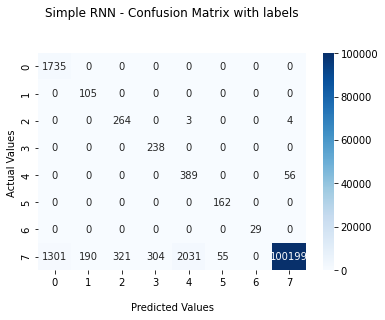

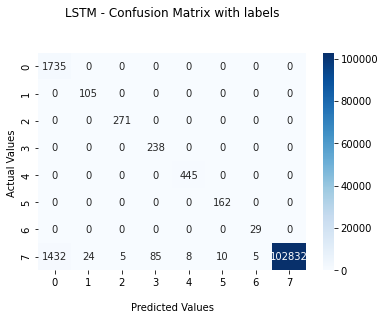

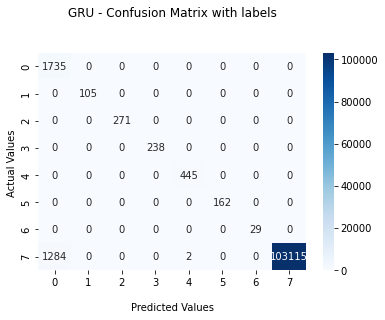

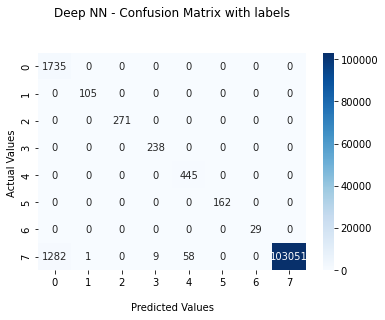

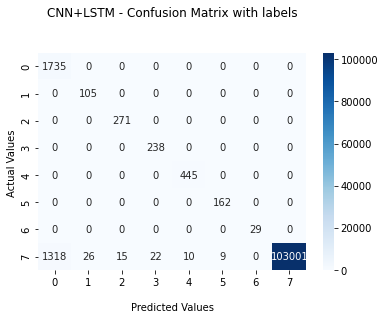

In [ ]:
import seaborn as sns
i=0
for cf in [cf_matrix_rnn, cf_matrix_lstm, cf_matrix_gru, cf_matrix_deep_nn, cf_matrix_cnn]:
    ax = sns.heatmap(cf, annot=True,fmt="d", cmap='Blues')

    if(i==0):
        ax.set_title('Simple RNN - Confusion Matrix with labels\n\n');
    elif(i==1):
        ax.set_title('LSTM - Confusion Matrix with labels\n\n');
    elif(i==2):
        ax.set_title('GRU - Confusion Matrix with labels\n\n');
    elif(i==3):
        ax.set_title('Deep NN - Confusion Matrix with labels\n\n');
    elif(i==4):
        ax.set_title('CNN+LSTM - Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # ## Ticket labels - List must be in alphabetical order
    # ax.xaxis.set_ticklabels(['False', 'True'])
    # ax.yaxis.set_ticklabels(['True','False'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    i+=1